In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from IPython.display import display

In [2]:
df = pd.read_excel('NEWDATASHEET.xlsx')
data=df.dropna()
data


,Year,Circuit,Driver,Race Position,Fastest Lap,Pole Position,Winning Constructor
0,2010,Bahrain,Fernando Alonso,1.0,Fernando Alonso,Sebastian Vettel,Ferrari
1,2010,Australia,Jenson Button,1.0,Mark Webber,Sebastian Vettel,Mercedes
2,2010,Malaysia,Sebastian Vettel,1.0,Mark Webber,Mark Webber,Red Bull
3,2010,Chinese,Jenson Button,1.0,Lewis Hamilton,Sebastian Vettel,Mercedes
4,2010,Spain,Mark Webber,1.0,Lewis Hamilton,Mark Webber,Red Bull
...,...,...,...,...,...,...,...
231,2021,United States,Max Verstappen,1.0,Lewis Hamilton,Max Verstappen,Red Bull
232,2021,Mexican,Max Verstappen,1.0,Valtteri Bottas,Valtteri Bottas,Red Bull
233,2021,Brazilian,Lewis Hamilton,1.0,Sergio Perez,Valtteri Bottas,Mercedes
234,2021,Qatar,Lewis Hamilton,1.0,Max Verstappen,Lewis Hamilton,Mercedes


In [ ]:
n_races = data.shape[0]
n_features = data.shape[1]-1

n_hamwins = len(data[data.Driver=='Lewis Hamilton'])

n_hamwins
n_races

In [ ]:
data.dtypes

# Predicting race winner


In [3]:
from sklearn.preprocessing import scale

df2 = pd.get_dummies(data=data,columns=['Driver','Circuit','Fastest Lap'])
df2

,Year,Race Position,Pole Position,Winning Constructor,Driver_Charles Leclerc,Driver_Daniel Ricciardo,Driver_Esteban Ocon,Driver_Fernando Alonso,Driver_Jenson Button,Driver_Kimi Raikkonen,...,Fastest Lap_Michael Schumacher,Fastest Lap_Nico Hulkenberg,Fastest Lap_Nico Rosberg,Fastest Lap_Pierre Gasly,Fastest Lap_Robert Kubica,Fastest Lap_Romain Grosjean,Fastest Lap_Sebastian Vettel,Fastest Lap_Sergio Perez,Fastest Lap_Valtteri Bottas,Fastest Lap_Vitaly Petrov
0,2010,1.0,Sebastian Vettel,Ferrari,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2010,1.0,Sebastian Vettel,Mercedes,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2010,1.0,Mark Webber,Red Bull,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2010,1.0,Sebastian Vettel,Mercedes,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2010,1.0,Mark Webber,Red Bull,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,2021,1.0,Max Verstappen,Red Bull,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
232,2021,1.0,Valtteri Bottas,Red Bull,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
233,2021,1.0,Valtteri Bottas,Mercedes,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
234,2021,1.0,Lewis Hamilton,Mercedes,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
import numpy as np



In [5]:
X_all = df2.drop(['Pole Position','Year','Winning Constructor','Race Position'],axis=1)
# X_all = df2.drop(['Race Position'],axis=1)
# X_all = data.drop(['Race Position','Year'],axis=1)
y_all = df2['Pole Position']
y_all = pd.get_dummies(data=y_all,columns='Pole Position')
# y_all = df2['Race Position']
# y_all = pd.get_dummies(data=y_all,columns='Race Position')
# y_all = np.asarray(y_all).astype(np.float32)


In [6]:
""" from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_all,y_all,test_size=0.2,random_state=5) """

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_all, y_all, test_size=0.3)

In [10]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [11]:
len(X_train.columns)

79

In [12]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(79,input_shape=(79,),activation='relu'),
    keras.layers.Dense(20,activation='relu'),
    
    keras.layers.Dense(16,activation='sigmoid'),
])

model.compile(optimizer='adam',loss='binary_crossentropy',
metrics=['accuracy'])

# model.fit(X_train,Y_train,epochs=1000)
model.fit(X_train,Y_train,epochs=500,validation_data=(X_val, Y_val))

Epoch 1/500
6/6 [==============================] - 1s 37ms/step - loss: 0.6833 - accuracy: 0.0242 - val_loss: 0.6747 - val_accuracy: 0.0286
Epoch 2/500
6/6 [==============================] - 0s 5ms/step - loss: 0.6675 - accuracy: 0.0485 - val_loss: 0.6577 - val_accuracy: 0.0000e+00
Epoch 3/500
6/6 [==============================] - 0s 6ms/step - loss: 0.6485 - accuracy: 0.0303 - val_loss: 0.6368 - val_accuracy: 0.0000e+00
Epoch 4/500
6/6 [==============================] - 0s 6ms/step - loss: 0.6251 - accuracy: 0.0242 - val_loss: 0.6113 - val_accuracy: 0.0000e+00
Epoch 5/500
6/6 [==============================] - 0s 6ms/step - loss: 0.5965 - accuracy: 0.0182 - val_loss: 0.5805 - val_accuracy: 0.0000e+00
Epoch 6/500
6/6 [==============================] - 0s 6ms/step - loss: 0.5627 - accuracy: 0.0303 - val_loss: 0.5443 - val_accuracy: 0.0000e+00
Epoch 7/500
6/6 [==============================] - 0s 6ms/step - loss: 0.5229 - accuracy: 0.0242 - val_loss: 0.5034 - val_accuracy: 0.0000e+00
Ep

In [13]:
model.evaluate(X_test,Y_test)


2/2 [==============================] - 0s 2ms/step - loss: 0.6008 - accuracy: 0.3333


[0.6007534861564636, 0.3333333432674408]

In [14]:
yp = model.predict(X_test)
yp[:5]

array([[2.05822502e-07, 1.04214939e-06, 1.31952973e-07, 1.17759919e-04,
        2.91311741e-03, 7.89857268e-07, 1.99954940e-07, 2.85539973e-05,
        2.52974033e-01, 1.51367292e-08, 1.46485411e-06, 1.80508621e-08,
        3.22178750e-09, 1.18721715e-07, 9.96304035e-01, 9.75553771e-09],
       [1.41936541e-03, 8.39624499e-06, 1.95464622e-09, 2.59666194e-07,
        1.89036131e-04, 1.31723013e-07, 6.51229115e-08, 1.57669922e-06,
        4.49630136e-07, 1.21208450e-06, 1.15841440e-05, 1.13020615e-08,
        7.02399120e-05, 2.08309575e-06, 4.43121612e-01, 4.05311584e-04],
       [2.20827943e-07, 7.87953791e-09, 3.00625125e-09, 7.83415004e-08,
        1.92444674e-07, 3.96045391e-10, 1.86600113e-09, 2.50250101e-04,
        9.98400271e-01, 2.35686165e-10, 8.49277494e-05, 4.97451502e-08,
        2.54851580e-03, 3.81878849e-08, 5.45190278e-06, 9.73123448e-08],
       [6.67229295e-03, 4.63238939e-05, 3.11594249e-06, 3.56745295e-05,
        5.36531210e-04, 3.09223651e-06, 1.45396609e-06, 6.241

In [43]:
y_pred = []
for element in yp[:]:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
y_pred

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [21]:
from sklearn.metrics import confusion_matrix,classification_report
classification_report(y_test,y_pred)

NameError: name 'y_pred' is not defined

In [19]:
import matplotlib.pyplot as plt

In [ ]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_all, y_all, test_size=0.3)

In [ ]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [17]:
hist = model.fit(X_train, Y_train,
          batch_size=3, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
55/55 [==============================] - 0s 2ms/step - loss: 0.0149 - accuracy: 0.9394 - val_loss: 0.4866 - val_accuracy: 0.4286
Epoch 2/100
55/55 [==============================] - 0s 2ms/step - loss: 0.0160 - accuracy: 0.9333 - val_loss: 0.4775 - val_accuracy: 0.4000
Epoch 3/100
55/55 [==============================] - 0s 2ms/step - loss: 0.0144 - accuracy: 0.9212 - val_loss: 0.4775 - val_accuracy: 0.4000
Epoch 4/100
55/55 [==============================] - 0s 2ms/step - loss: 0.0138 - accuracy: 0.9394 - val_loss: 0.4916 - val_accuracy: 0.4286
Epoch 5/100
55/55 [==============================] - 0s 2ms/step - loss: 0.0129 - accuracy: 0.9394 - val_loss: 0.4839 - val_accuracy: 0.3714
Epoch 6/100
55/55 [==============================] - 0s 2ms/step - loss: 0.0140 - accuracy: 0.9333 - val_loss: 0.4782 - val_accuracy: 0.4286
Epoch 7/100
55/55 [==============================] - 0s 2ms/step - loss: 0.0128 - accuracy: 0.9212 - val_loss: 0.4958 - val_accuracy: 0.3143
Epoch 8/100
5

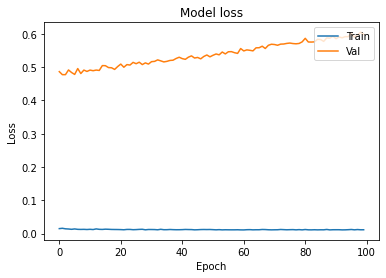

In [20]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

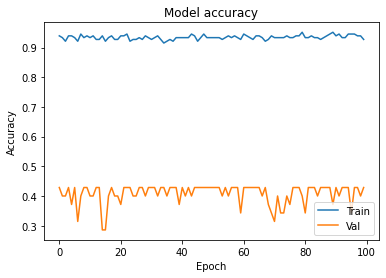

In [21]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()